In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

transactions = pd.read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [126]:
def segundo(tiempo) -> int:
    return tiempo - 86400

def minuto_hora(tiempo) -> int:
    minuto_hora = tiempo / 60
    if minuto_hora > round(minuto_hora):
        return int(round(minuto_hora) + 1)
    else:
        return int(round(minuto_hora))
    
def dia(tiempo) -> int:
    dia = tiempo / 24
    if dia > round(dia):
        return int(round(dia) + 1)
    else:
        return int(round(dia))
    
def semana(tiempo) -> int:
    semana = tiempo / 7
    if semana > round(semana):
        return int(round(semana) + 1)
    else:
        return int(round(semana))

def mes(tiempo) -> int:
    mes = tiempo / 4
    if mes > round(mes):
        return int(round(mes) + 1)
    else:
        return int(round(mes))

In [127]:
#   Sexto analisis
analisis = transactions[["target", "timestamp"]]

In [128]:
analisis = analisis.rename(columns={"target":"Fraude", "timestamp":"Segundo"})

In [129]:
analisis["Segundo"] = analisis.Segundo.map(segundo)

In [130]:
analisis["Minuto"] = analisis.Segundo.map(minuto_hora)

In [131]:
analisis["Hora"] = analisis.Minuto.map(minuto_hora)

In [132]:
analisis["Dia"] = analisis.Hora.map(dia)

In [133]:
analisis["Semana"] = analisis.Dia.map(semana)

In [134]:
analisis["Mes"] = analisis.Semana.map(mes)

In [135]:
analisis

,Fraude,Segundo,Minuto,Hora,Dia,Semana,Mes
0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1
2,0,69,2,1,1,1,1
3,0,99,2,1,1,1,1
4,0,106,2,1,1,1,1
...,...,...,...,...,...,...,...
501954,0,13065175,217753,3630,152,22,6
501955,0,13065180,217753,3630,152,22,6
501956,0,13065317,217756,3630,152,22,6
501957,0,13065320,217756,3630,152,22,6


In [136]:
analisis_x_seg = (f"Segundos: {analisis.Segundo.max()}", f"Cantidad: {analisis.Fraude.sum()}", f"Promedio: {round(analisis.Fraude.mean() * 100, 3)}%")

In [137]:
analisis_x_seg

('Segundos: 13065440', 'Cantidad: 17580', 'Promedio: 3.502%')

In [138]:
analisis_x_min = analisis[ analisis.Fraude == 1 ][ "Minuto" ].value_counts().reset_index()

In [139]:
analisis_x_min = analisis_x_min.rename(columns={"count":"Cantidad"})

In [140]:
analisis_x_min["Promedio en %"] = analisis_x_min.Cantidad * 100 / analisis.Fraude.count()

In [141]:
analisis_x_min

,Minuto,Cantidad,Promedio en %
0,136426,6,0.001195
1,139695,6,0.001195
2,73412,5,0.000996
3,148153,5,0.000996
4,27508,4,0.000797
...,...,...,...
16306,217493,1,0.000199
16307,217494,1,0.000199
16308,217511,1,0.000199
16309,217512,1,0.000199


In [200]:
minutos = analisis_x_min.Cantidad.value_counts().reset_index().rename(columns={"Cantidad":"Fraudes a la vez", "count":"Cantidad de minutos por Fraude"})

In [201]:
minutos

,Fraudes a la vez,Cantidad de minutos por Fraude
0,1,15136
1,2,1097
2,3,68
3,4,6
4,5,2
5,6,2


In [142]:
analisis_x_hora = analisis[ analisis.Fraude == 1 ][ "Hora" ].value_counts().reset_index()

In [143]:
analisis_x_hora = analisis_x_hora.rename(columns={"count":"Cantidad"})

In [197]:
analisis_x_hora["Promedio en %"] = analisis_x_hora.Cantidad * 100 / analisis.Fraude.count()

In [145]:
analisis_x_hora

,Hora,Cantidad,Promedio en %
0,1529,42,0.008367
1,1344,36,0.007172
2,1530,33,0.006574
3,2781,32,0.006375
4,2790,32,0.006375
...,...,...,...
3051,82,1,0.000199
3052,84,1,0.000199
3053,3573,1,0.000199
3054,3583,1,0.000199


In [198]:
horas = analisis_x_hora.Cantidad.value_counts().reset_index().rename(columns={"Cantidad":"Fraudes a la vez", "count":"Cantidad de horas por Fraude"})

In [199]:
horas

,Fraudes a la vez,Cantidad de horas por Fraude
0,1,419
1,2,399
2,3,349
3,4,308
4,5,277
5,6,252
6,7,209
7,8,189
8,9,134
9,10,105


In [146]:
analisis_x_dia = analisis[ analisis.Fraude == 1 ][ "Dia" ].value_counts().reset_index()

In [147]:
analisis_x_dia = analisis_x_dia.rename(columns={"count":"Cantidad"})

In [148]:
analisis_x_dia["Promedio en %"] = analisis_x_dia.Cantidad * 100 / analisis.Fraude.count()

In [149]:
analisis_x_dia = analisis_x_dia.sort_values("Dia")

In [150]:
analisis_x_dia

,Dia,Cantidad,Promedio en %
81,1,112,0.022313
56,2,123,0.024504
116,3,92,0.018328
74,4,115,0.022910
48,5,127,0.025301
...,...,...,...
123,148,86,0.017133
145,149,66,0.013148
142,150,69,0.013746
106,151,99,0.019723


In [208]:
analisis_x_dia.describe()

,Dia,Cantidad,Promedio en %
count,152.000000,152.000000,152.000000
mean,76.500000,115.657895,0.023041
std,44.022721,32.026708,0.006380
min,1.000000,31.000000,0.006176
25%,38.750000,94.750000,0.018876
50%,76.500000,114.500000,0.022811
75%,114.250000,135.000000,0.026895
max,152.000000,234.000000,0.046617


Text(0.5, 1.0, 'Fraude a lo largo de los días')

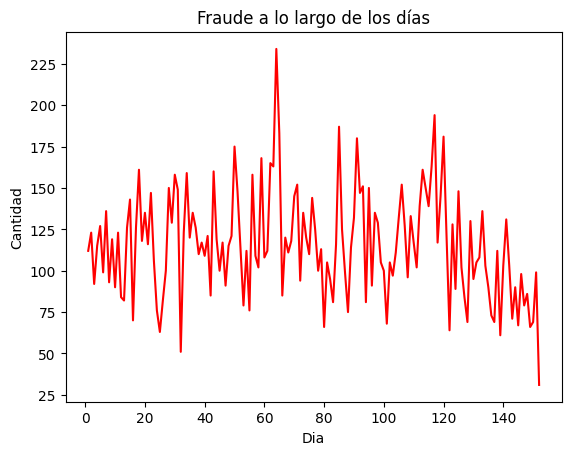

In [187]:
dia = sns.lineplot(data=analisis_x_dia, x="Dia", y="Cantidad", color="red")
dia.set_title("Fraude a lo largo de los días")

In [202]:
dias = analisis_x_dia.Cantidad.value_counts().reset_index().rename(columns={"Cantidad":"Fraudes a la vez", "count":"Cantidad de dias por Fraude"})

In [203]:
dias

,Fraudes a la vez,Cantidad de dias por Fraude
0,112,4
1,135,4
2,117,4
3,105,4
4,100,4
...,...,...
81,71,1
82,67,1
83,98,1
84,86,1


In [152]:
analisis_x_semana = analisis[ analisis.Fraude == 1 ][ "Semana" ].value_counts().reset_index()

In [153]:
analisis_x_semana = analisis_x_semana.rename(columns={"count":"Cantidad"})

In [154]:
analisis_x_semana["Promedio en %"] = analisis_x_semana.Cantidad * 100 / analisis.Fraude.count()

In [155]:
analisis_x_semana = analisis_x_semana.sort_values("Semana")

In [156]:
analisis_x_semana

,Semana,Cantidad,Promedio en %
12,1,804,0.160172
17,2,717,0.142840
7,3,869,0.173122
15,4,724,0.144235
4,5,889,0.177106
13,6,803,0.159973
11,7,823,0.163958
9,8,862,0.171727
2,9,927,0.184676
1,10,996,0.198423


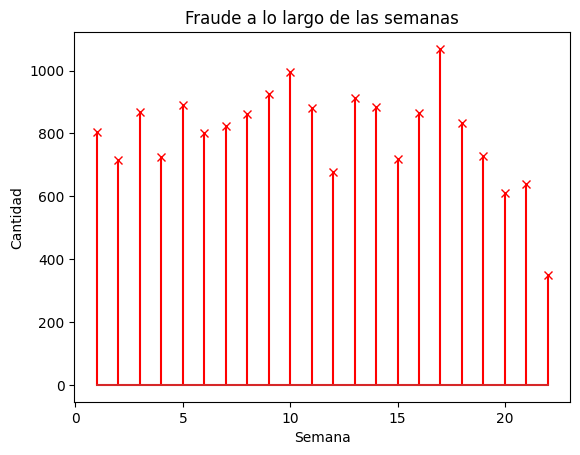

In [191]:
plt.stem(analisis_x_semana.Semana, analisis_x_semana.Cantidad, linefmt="red", markerfmt="x")
plt.title("Fraude a lo largo de las semanas")
plt.xlabel("Semana")
plt.ylabel("Cantidad")
plt.show()

In [162]:
analisis_x_mes = analisis[ analisis.Fraude == 1 ][ "Mes" ].value_counts().reset_index()

In [163]:
analisis_x_mes = analisis_x_mes.rename(columns={"count":"Cantidad"})

In [164]:
analisis_x_mes["Promedio en %"] = analisis_x_mes.Cantidad * 100 / analisis.Fraude.count()

In [165]:
analisis_x_mes = analisis_x_mes.sort_values("Mes")

In [166]:
analisis_x_mes

,Mes,Cantidad,Promedio en %
4,1,3114,0.620369
2,2,3377,0.672764
0,3,3479,0.693084
1,4,3380,0.673362
3,5,3240,0.645471
5,6,990,0.197227


Text(0.5, 1.0, 'Fraudes a lo largo de los meses')

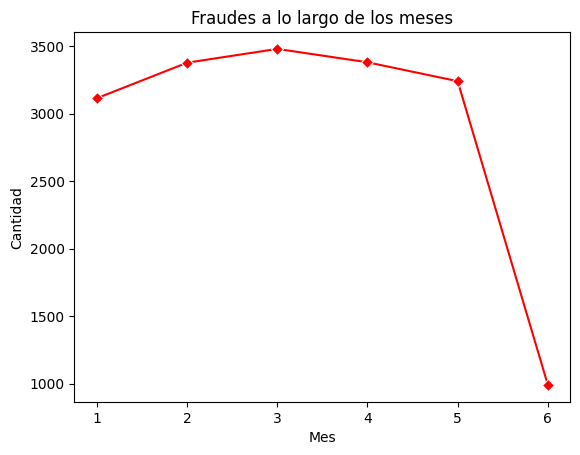

In [185]:
mes = sns.lineplot(data=analisis_x_mes, x="Mes", y="Cantidad" , color="red", marker="D")
mes.set_title("Fraudes a lo largo de los meses")